In [6]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from models import PoissonRandomWalk
from experiments import CoalMiningExperiment
from data import coal_mining_data

# Model and Experiment

In [2]:
model = PoissonRandomWalk()

INFO:root:Performing 2 pilot runs with the poisson_model model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 110)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 110)
INFO:root:Shape of hyper_prior_draws batch after 2 pilot simulations: (batch_size = 2, )
INFO:root:Shape of local_prior_draws batch after 2 pilot simulations: (batch_size = 2, 110)
INFO:root:No shared_prior_draws provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional prior non-batchable context provided.


In [3]:
experiment = CoalMiningExperiment(model)

INFO:root:Initialized empty loss history.
INFO:root:Initialized empty simulation memory.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [4]:
history = experiment.run(epochs=10, iterations_per_epoch=1000, batch_size=32)

Training epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

# Evaluation

In [7]:
posterior_samples = experiment.amortizer.sample(
    np.log1p(coal_mining_data['disasters'][None, :, None]), 1000)

In [8]:
local_samples = np.expm1(posterior_samples['local_samples'])
post_mean = local_samples.mean(axis=0)
post_std = local_samples.std(axis=0)

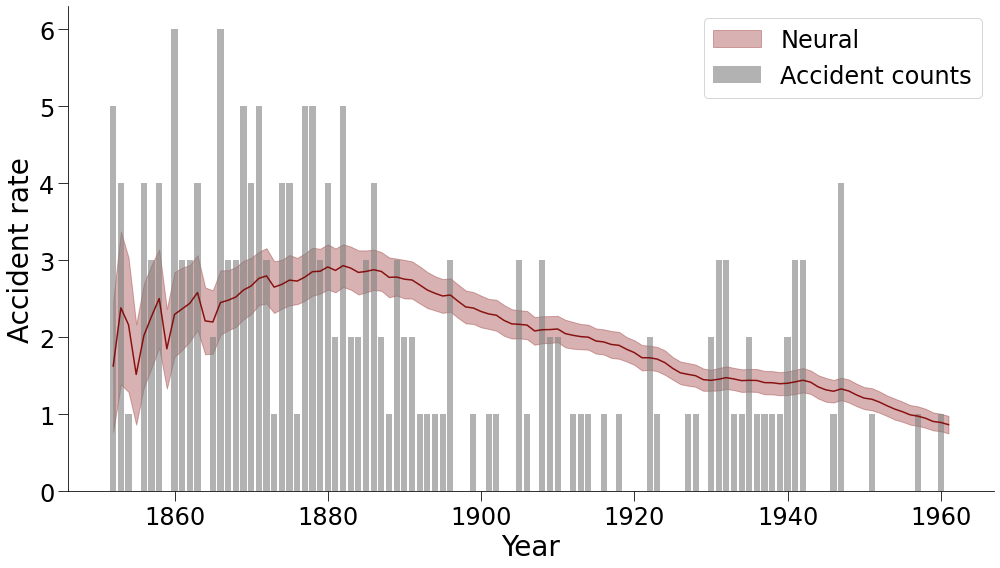

In [9]:
time = coal_mining_data['year']
plt.figure(figsize=(14, 8))
plt.plot(time, post_mean, alpha=0.9, color='maroon')
plt.fill_between(time, post_mean+post_std, post_mean-post_std, alpha=0.3, label='Neural', edgecolor="none", color='maroon')

plt.bar(time, coal_mining_data['disasters'], align='center', facecolor='gray', alpha=0.6, label="Accident counts")

plt.ylabel('Accident rate', fontsize=28)
plt.xlabel('Year', fontsize=28)
plt.tick_params(axis='both', which='major', length=10, labelsize=24)

plt.legend(fontsize=24)
sns.despine()
plt.tight_layout()